In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import math

from ascalar import Scalar
from viz import draw_dot, trace
from nn import Neuron, Layer, MLP

In [3]:
# check output
a = Scalar(5)

# check repr
print(a)

Scalar(output=5)


In [4]:
# check operations
b = Scalar(3)

a_plus_b = a + b
assert math.isclose(a_plus_b.output, 8)

a_minus_b = a - b
assert math.isclose(a_minus_b.output, 2)

a_times_b = a * b
assert math.isclose(a_times_b.output, 15)

a_div_b = a / b
assert math.isclose(a_div_b.output, 5 / 3)

a_pow_b = a ** 3
assert math.isclose(a_pow_b.output, 5 ** 3)

In [5]:
# check reflected operations with ints
result = 3 + a
assert math.isclose(result.output, 8), f"{result.output=} is not 8"

result = 3 * a
assert math.isclose(result.output, 15)

result = 3 / a
assert math.isclose(result.output, 3/5)


(Scalar(output=6), Scalar(output=2))
c._inputs=(Scalar(output=6), Scalar(output=2))
nodes={Scalar(output=8), Scalar(output=2), Scalar(output=3), Scalar(output=6)}, edges={(Scalar(output=3), Scalar(output=6)), (Scalar(output=2), Scalar(output=6)), (Scalar(output=2), Scalar(output=8)), (Scalar(output=6), Scalar(output=8))}


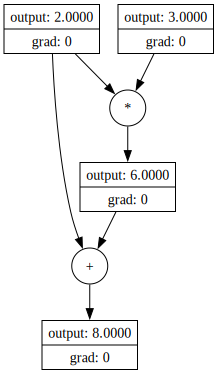

In [6]:
a = Scalar(2)
b = Scalar(3)
c = a * b + a
dot = draw_dot(c)

print(c._inputs)

nodes, edges = trace(c)
print(f"{c._inputs=}")
print(f"{nodes=}, {edges=}")


# dot.render('computation_graph', view=True) 
dot

In [7]:
c.backwards()

In [8]:
grad_dot = draw_dot(c)

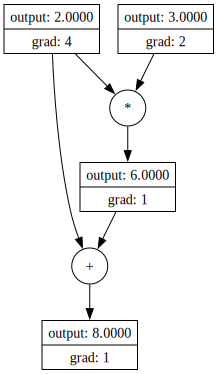

In [9]:
grad_dot

In [10]:
e = Scalar(0.5)._tanh_with_exp()
e.backwards()
e_dot = draw_dot(e)

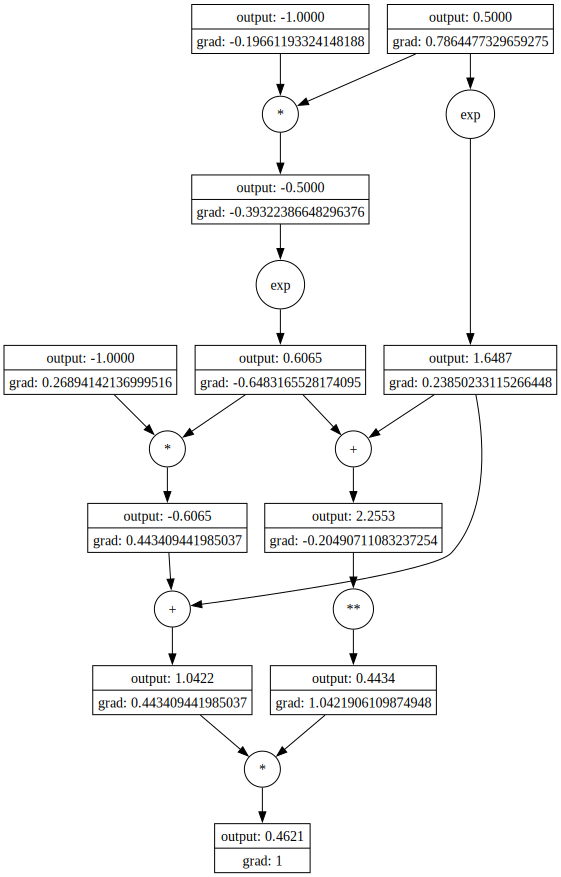

In [11]:
e_dot

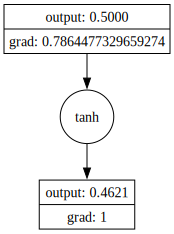

In [12]:
f = Scalar(0.5).tanh()
f.backwards()
f_dot = draw_dot(f)
f_dot


In [13]:
# neuron of 3 inputs, 1 output
n = Neuron(3)
print("initial ", n)

# run forward
x = [1, 2, 3]
out = n(x)
print(f"forward {out=}")

# check backwards
out.backwards()
print(f"weight grads", f"{[wi.grad for wi in n.w]}")
print(f"bias grads", f"{n.b.grad}")

draw_dot(out)

initial  Neuron(self.w=[Scalar(output=-0.47491714471606894), Scalar(output=0.8827639653178128), Scalar(output=-0.5446027665518125)], self.b=Scalar(output=0.9756586354052543))


AssertionError: mismatched num_inputs len(self.w)=3 and input length len(x)=1

In [14]:
# Create a layer: 3 inputs → 4 outputs
layer = Layer(3, 4)
print(f"Layer has {len(layer.neurons)} neurons")

# Test forward
x = [1, 2, 3]
out = layer(x)
print(f"Output: {out}")  # Should be list of 4 Scalars
print(f"Output values: {[o.output for o in out]}")  # All in (-1, 1) due to tanh

# Check shapes
assert len(out) == 4, "Should have 4 outputs"

# Test backprop - need a single scalar loss
out[1].backwards()

# Visualize one output's graph
draw_dot(out[1])

Layer has 4 neurons


AssertionError: mismatched num_inputs len(self.w)=3 and input length len(x)=1

Total parameters: 41
Output: Scalar(output=0.9338328755620448)
Output value: 0.9338328755620448
Some param grads: [-0.003397370000991052, -0.006794740001982104, -0.010192110002973157, -0.003397370000991052, -0.10276551328179034]


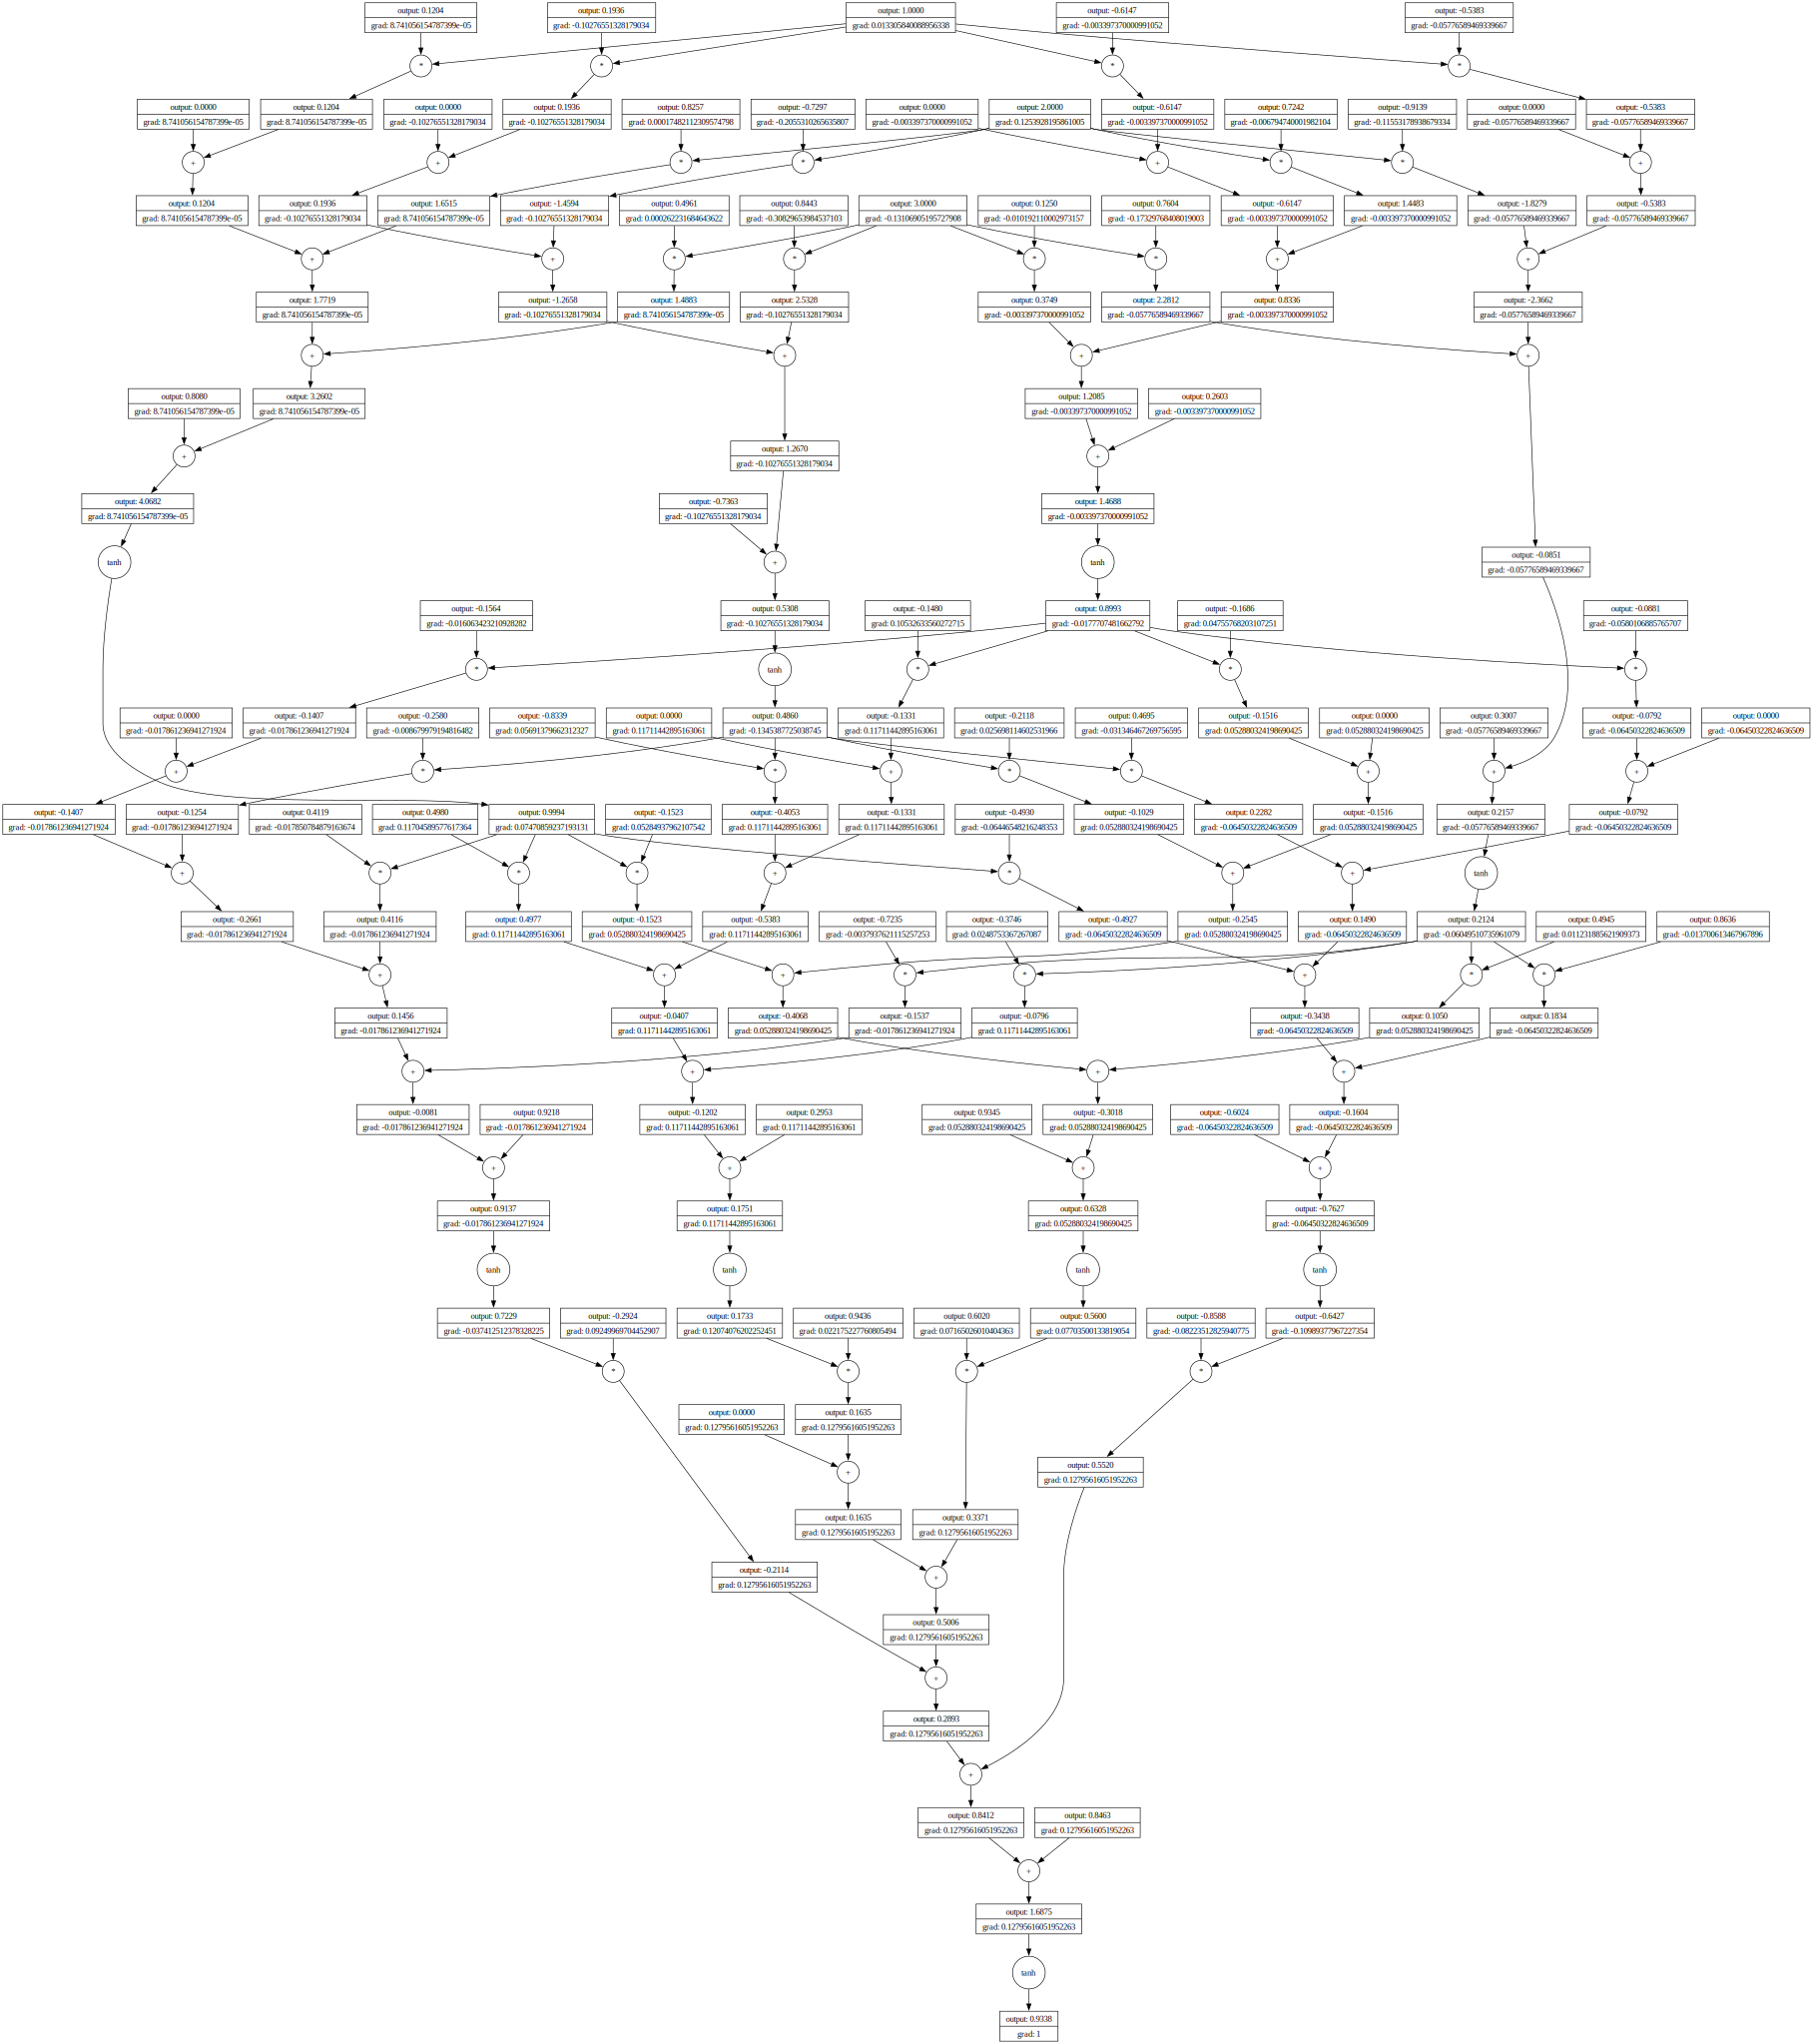

In [16]:
# Create MLP: 3 inputs → 4 hidden → 4 hidden → 1 output
mlp = MLP([3, 4, 4, 1])

# Check parameter count
# Layer 1: 4 neurons × (3 weights + 1 bias) = 16
# Layer 2: 4 neurons × (4 weights + 1 bias) = 20
# Layer 3: 1 neuron × (4 weights + 1 bias) = 5
# Total = 41
print(f"Total parameters: {len(mlp.parameters())}")
assert len(mlp.parameters()) == 41

# Forward pass
x = [Scalar(1.0), Scalar(2.0), Scalar(3.0)]
out = mlp(*x)
print(f"Output: {out}")  # Single Scalar (due to unwrap)
print(f"Output value: {out.output}")  # Should be in (-1, 1)

# Backprop
out.backwards()

# Check gradients exist
print(f"Some param grads: {[p.grad for p in mlp.parameters()[:5]]}")

# Visualize
draw_dot(out)